# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [26]:
import pandas as pd
df = pd.read_csv('flight_encoded.csv')
df.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,Dept_min,Dura_hours,Dura_mins
0,0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,22,20,2,50
1,1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,5,50,7,25
2,2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,9,25,19,30
3,3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,18,5,5,25
4,4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,16,50,4,45


In [27]:
df.shape

(10683, 15)

In [28]:
rows,columns=df.shape
rows

10683

In [29]:
columns

15

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution

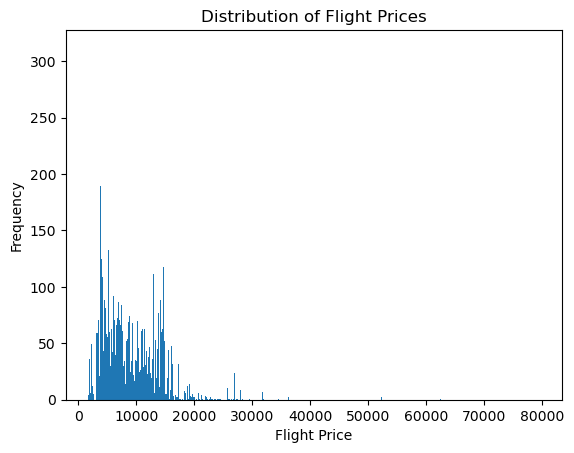

In [31]:
import matplotlib.pyplot as plt 
flight_prices=df['Price']

plt.hist(flight_prices,bins=1000)
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.title("Distribution of Flight Prices")

plt.show()

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [32]:
min = df['Price'].min()
max = df['Price'].max()
range = max-min
print ('Min:',min ,'\nMax:',max , '\nRange:',range)

Min: 1759 
Max: 79512 
Range: 77753


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines

Text(0.5, 1.0, 'Price Variation by Airline')

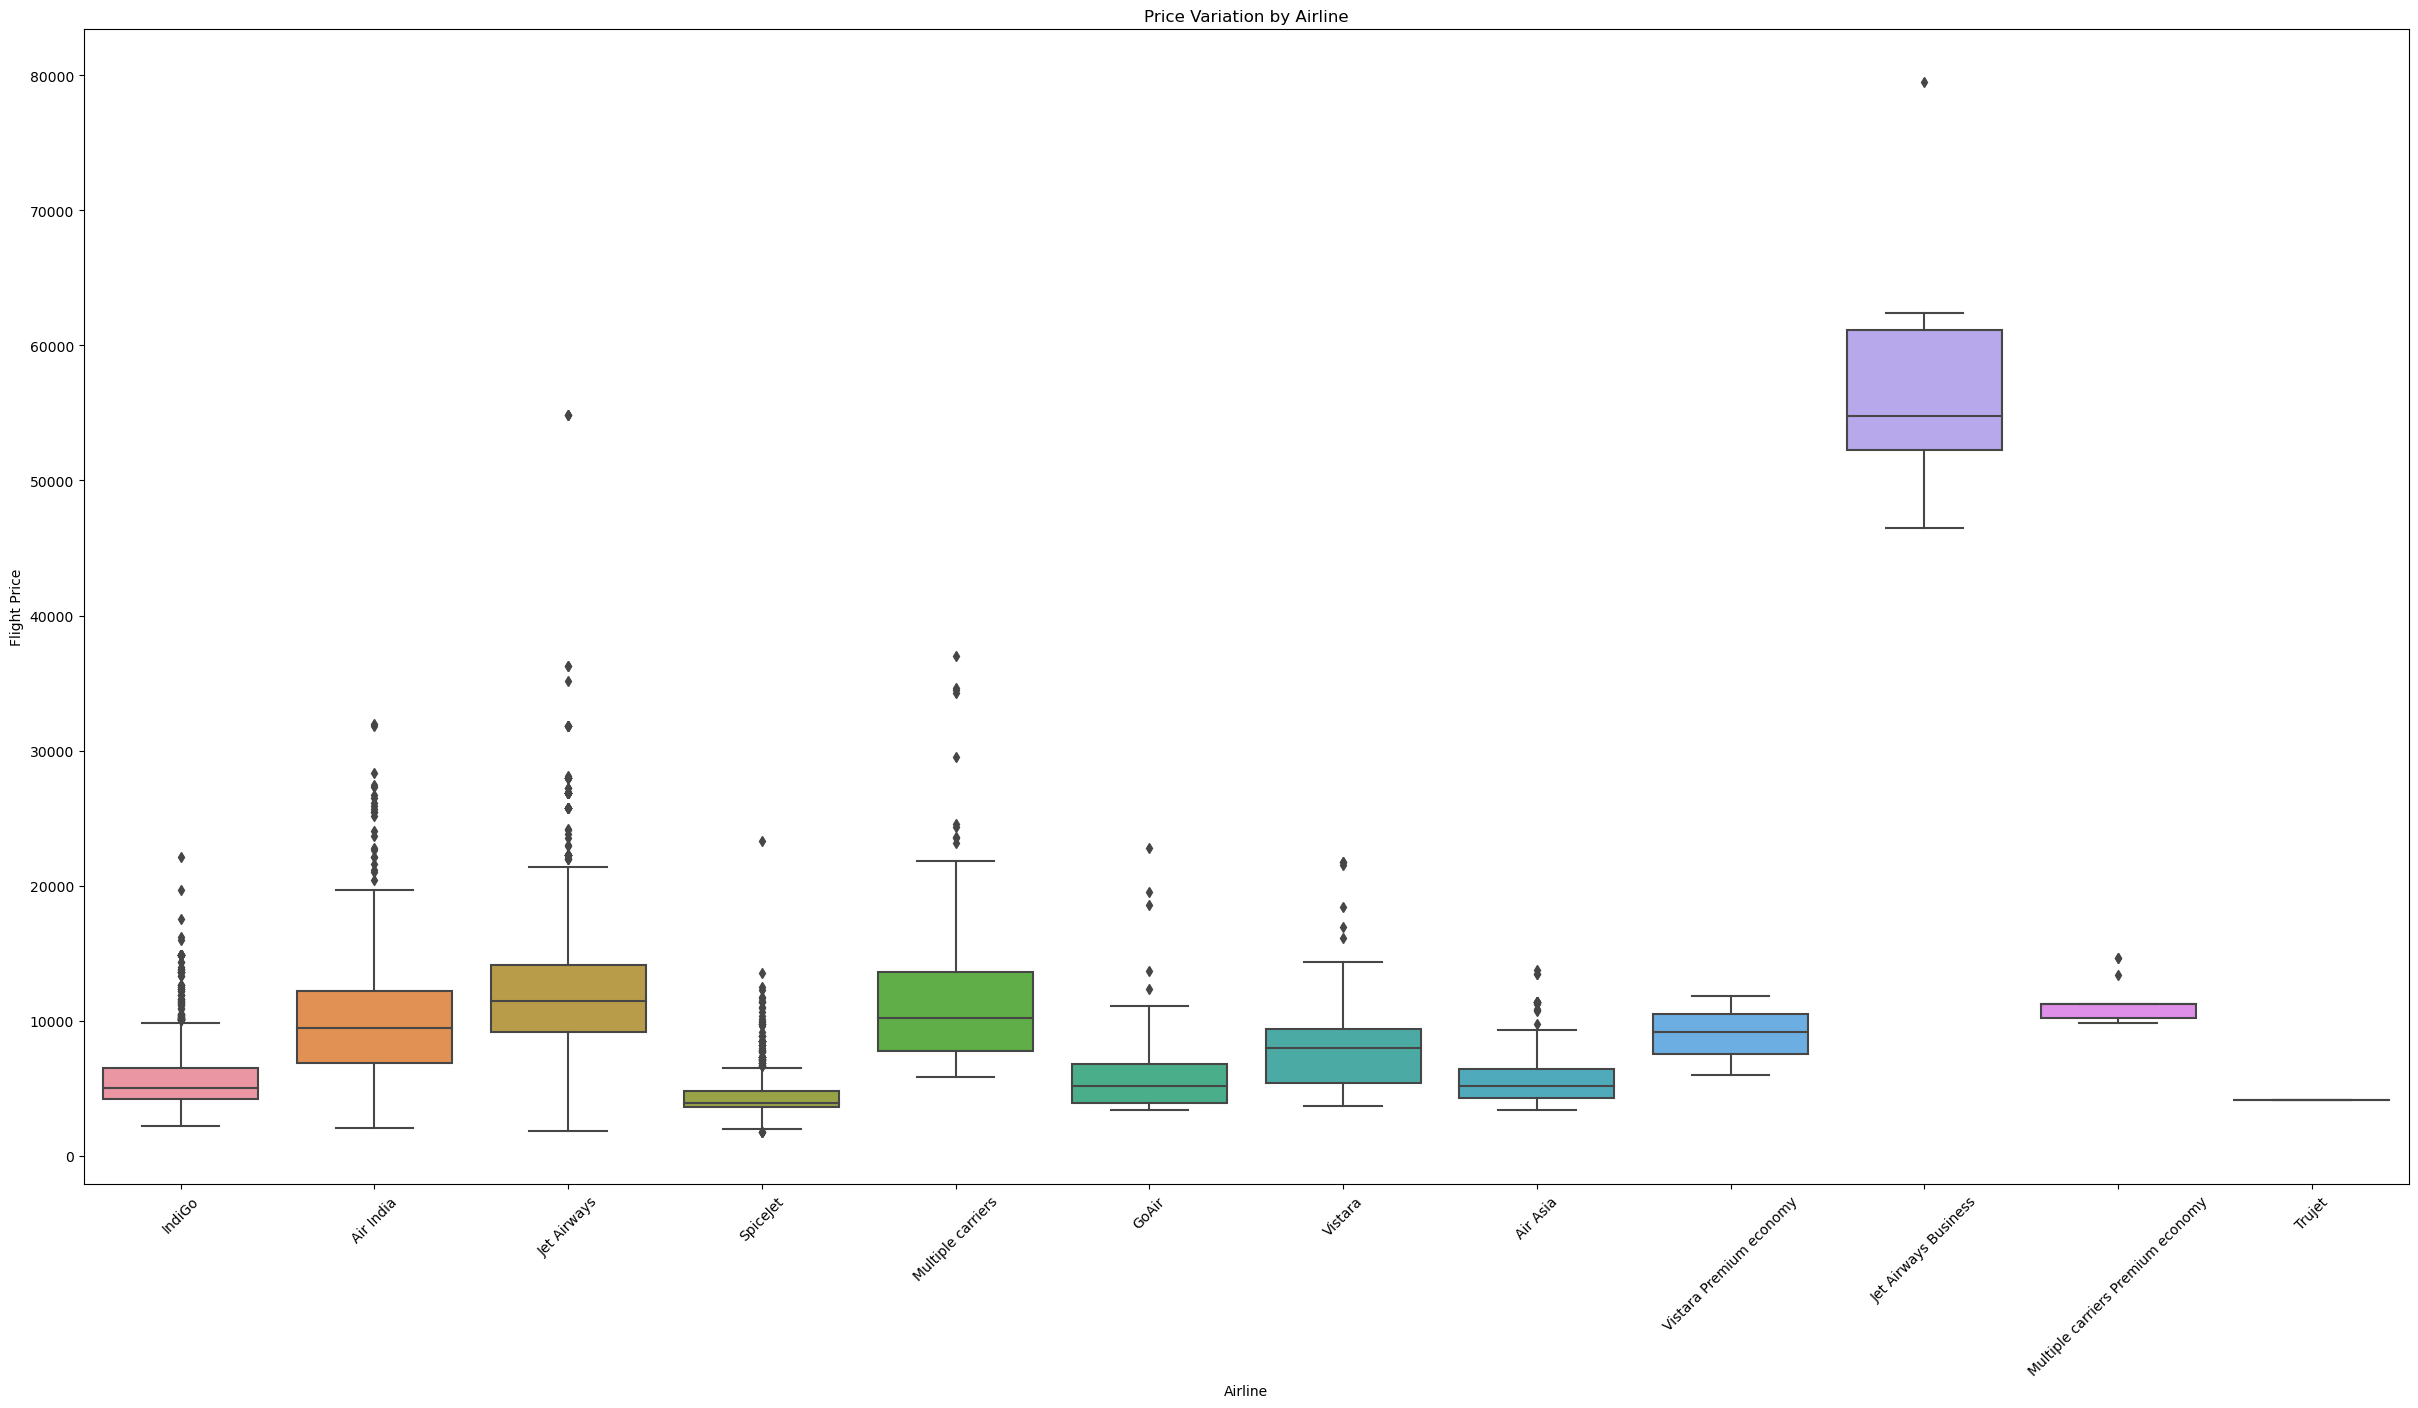

In [33]:
import seaborn as sns 
plt.figure(figsize=(30,15))
sns.boxplot(x='Airline',y='Price',data=df)

plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.xticks(rotation=45)
plt.title('Price Variation by Airline')

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<AxesSubplot: ylabel='Price'>

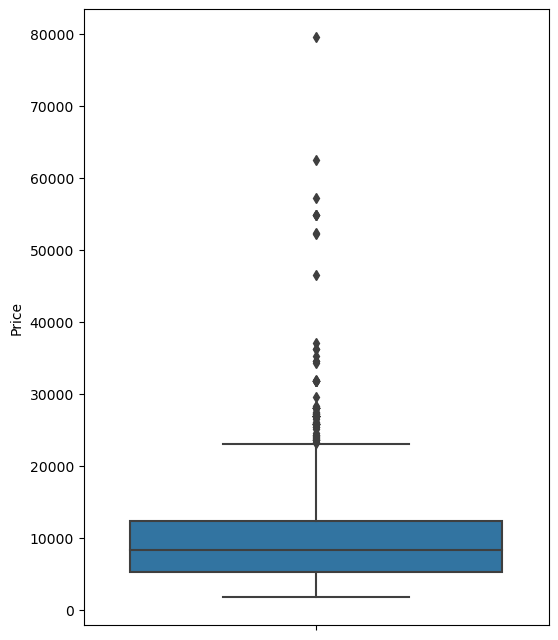

In [34]:
plt.figure(figsize=(6,8))
sns.boxplot(y='Price',data=df)

Outliers can skew statistical measures, such as the mean and standard deviation, and can influence data patterns and trends.

Outliers may indicate interesting insights or anomalies in the data, but they can also distort statistical summaries or models if not handled appropriately.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

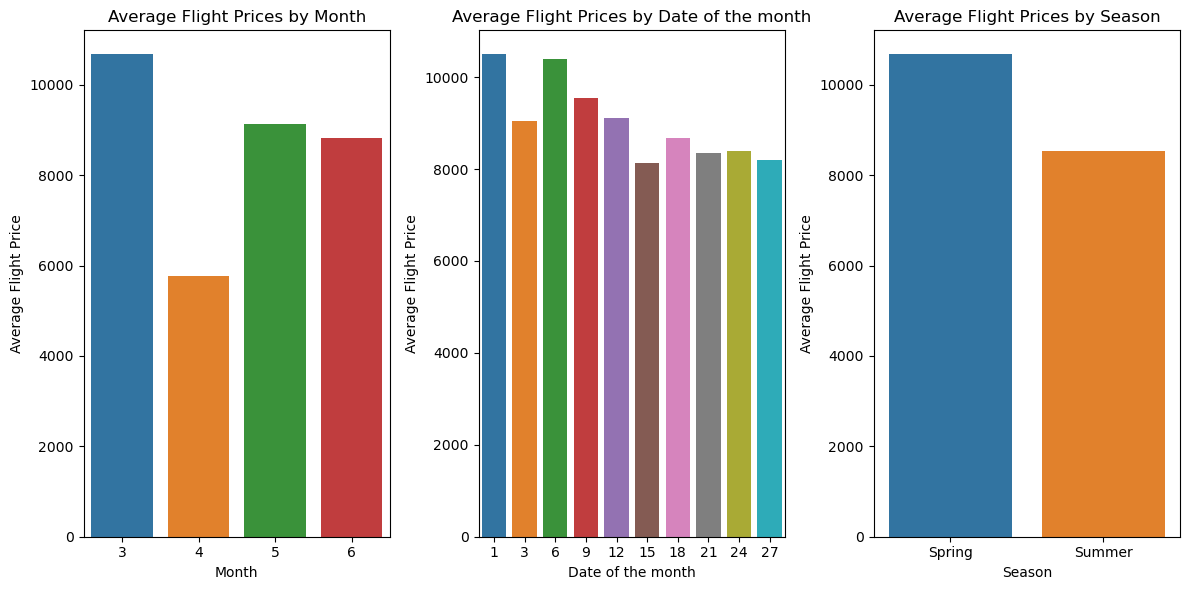

In [41]:
monthly_prices=df.groupby('Month')['Price'].mean().reset_index()

day_prices=df.groupby('Date')['Price'].mean().reset_index()

df['Season']=df['Month'].map({1:'Winter',2:'Spring',3:'Spring',4:'Summer',5:'Summer',6:'Summer',7:'Summer',8:'Fall',9:'Fall',10:'Fall',11:'Winter',12:'Winter'})
seasonal_prices=df.groupby('Season')['Price'].mean().reset_index()

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.barplot(x='Month',y='Price',data=monthly_prices)
plt.xlabel('Month')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Month')

plt.subplot(1,3,2)
sns.barplot(x='Date',y='Price',data=day_prices)
plt.xlabel('Date of the month')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Date of the month')

plt.subplot(1,3,3)
sns.barplot(x='Season',y='Price',data=seasonal_prices)
plt.xlabel('Season')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Season')

plt.tight_layout()
plt.show()

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

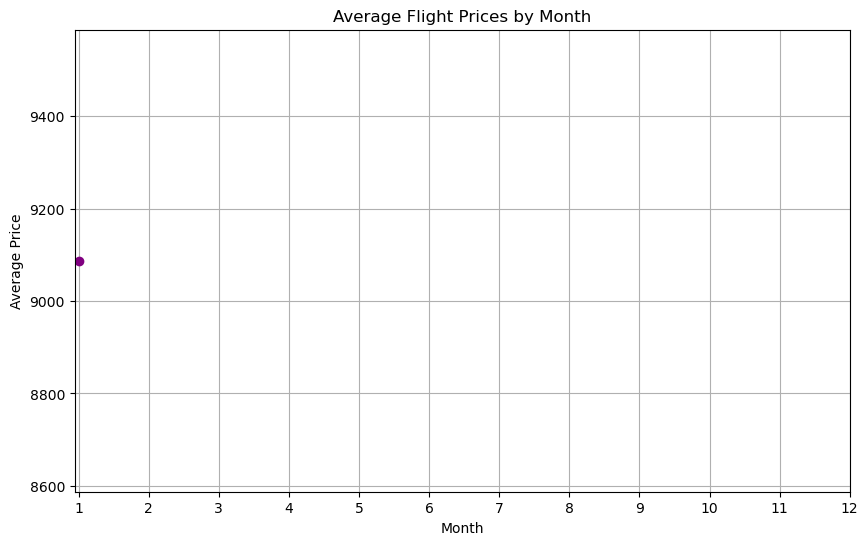

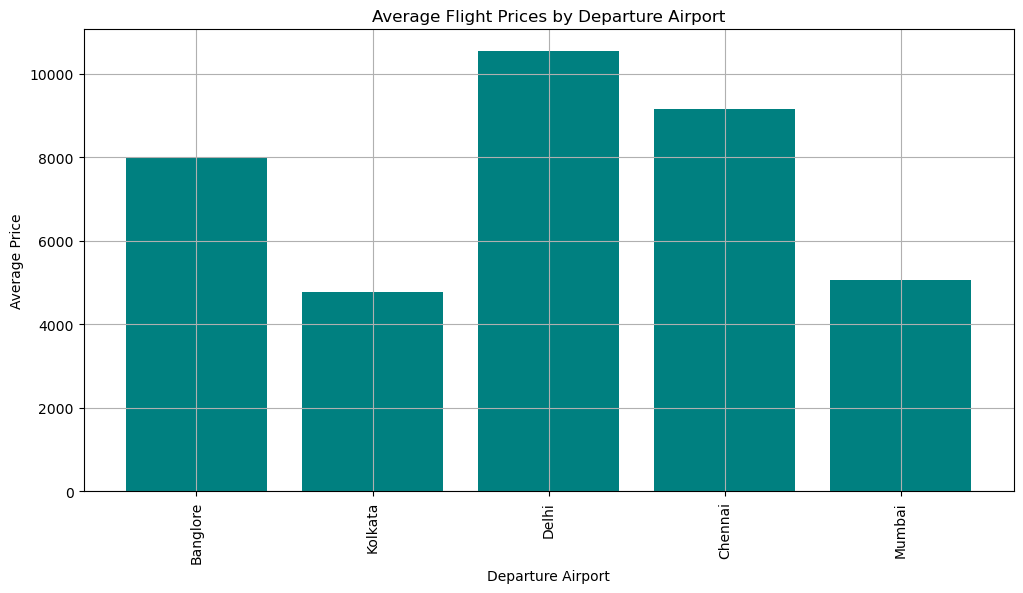

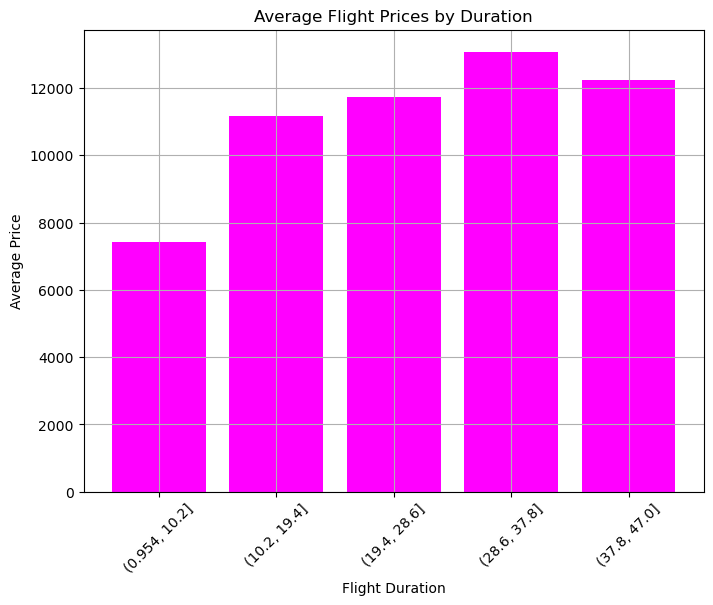

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the flight price dataset from a CSV file
df = pd.read_csv('flight_encoded.csv')

# Analyze trends based on date and time
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_avg_prices = df.groupby('Month')['Price'].mean()

# Create a line plot for average monthly prices
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_prices.index, monthly_avg_prices.values, marker='o', color='purple', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.gca().set_xticks(np.arange(1, 13))  # Set x-axis ticks to represent months
plt.grid(True)
plt.show()

# Analyze trends based on departure and arrival airports
departure_airports = df['Source'].unique()
avg_prices_by_airport = df.groupby('Source')['Price'].mean()

# Create a bar chart for average prices by departure airport
plt.figure(figsize=(12, 6))
plt.bar(departure_airports, avg_prices_by_airport, color='teal')
plt.xlabel('Departure Airport')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Departure Airport')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Analyze trends based on flight duration
duration_bins = pd.cut(df['Dura_hours'], bins=5)
avg_prices_by_duration = df.groupby(duration_bins)['Price'].mean()

# Create a bar chart for average prices by flight duration
plt.figure(figsize=(8, 6))
plt.bar(avg_prices_by_duration.index.astype(str), avg_prices_by_duration, color='magenta')
plt.xlabel('Flight Duration')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

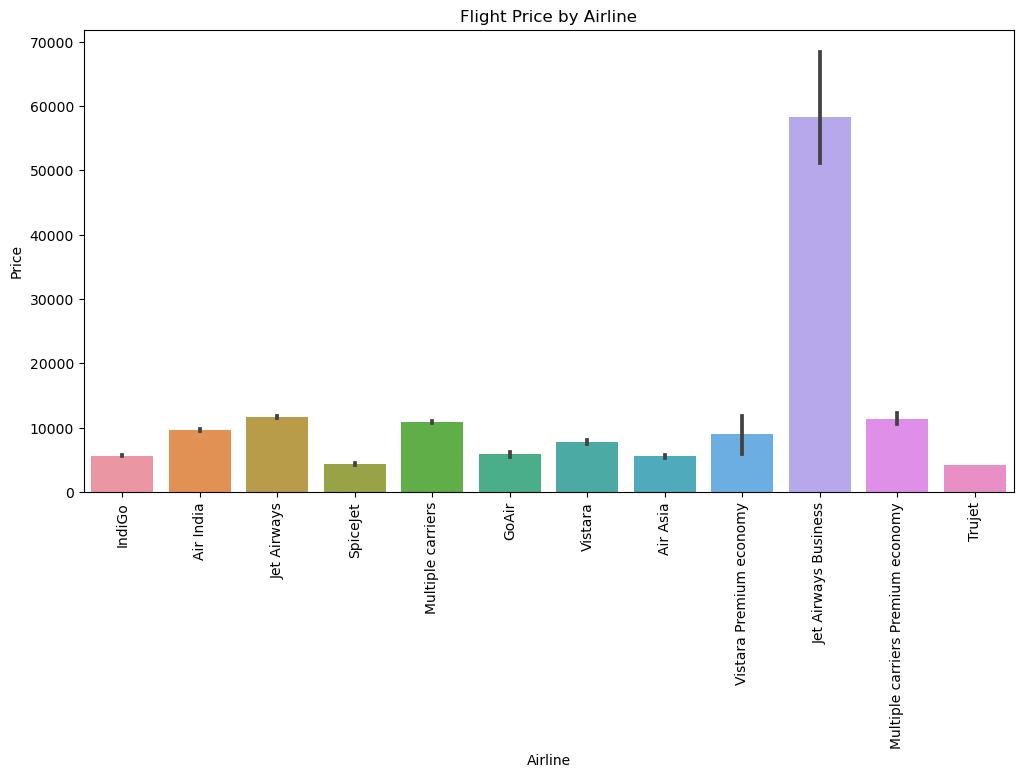

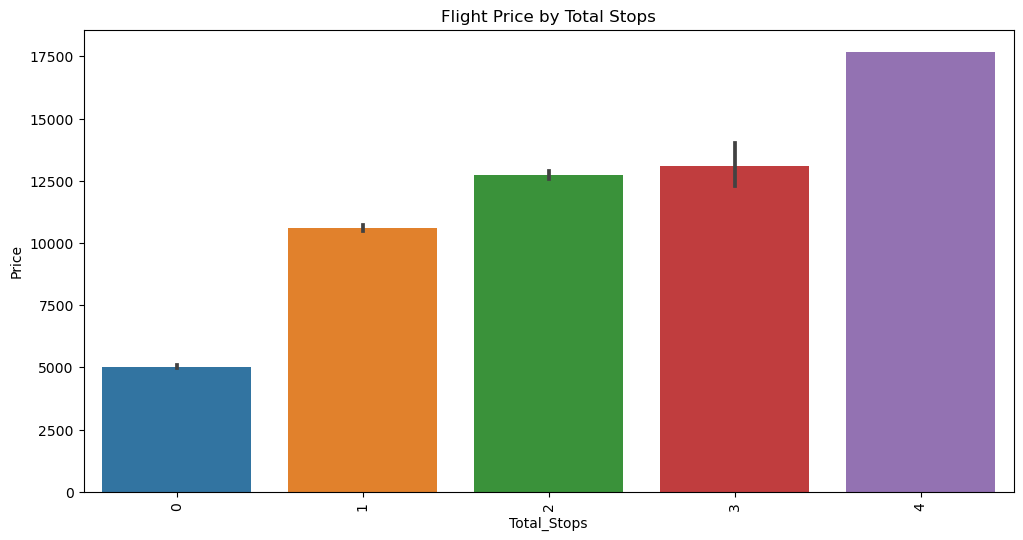

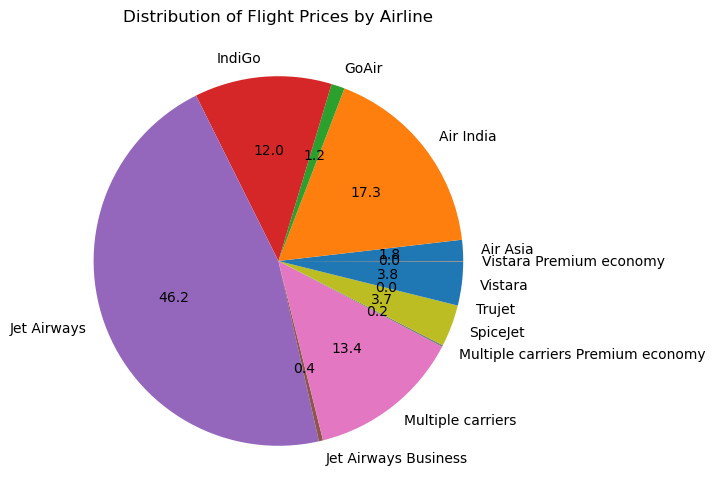

In [44]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df=pd.read_csv('flight_encoded.csv')

plt.figure(figsize=(12,6))
sns.barplot(x='Airline',y='Price',data=df)
plt.title('Flight Price by Airline')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x='Total_Stops',y='Price',data=df)
plt.title('Flight Price by Total Stops')
plt.xticks(rotation=90)
plt.show()


airline_price=df.groupby('Airline')['Price'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.pie(airline_price['Price'],labels=airline_price['Airline'],autopct='%1.1f')
plt.title('Distribution of Flight Prices by Airline')
plt.show()


# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [73]:
import pandas as pd 
df=pd.read_csv('playstore_encoded.csv')
df.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [63]:
rows=df.shape[0]
columns=df.shape[1]

In [64]:
rows

10840

In [65]:
columns

17

In [74]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

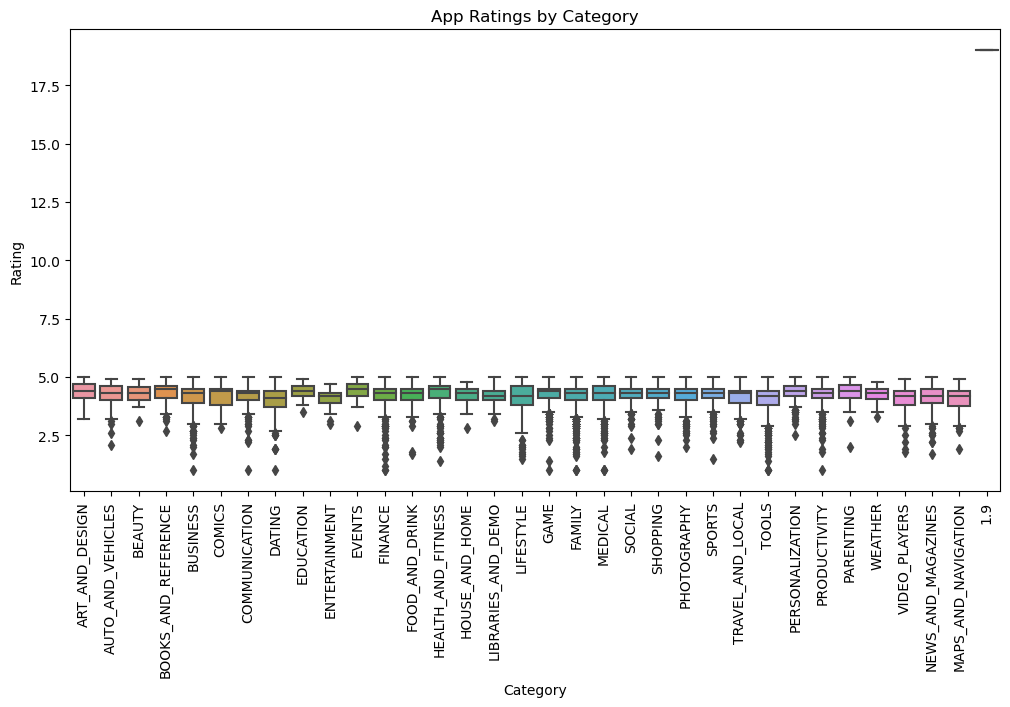

In [66]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

plt.figure(figsize=(12,6))
sns.boxplot(x='Category',y='Rating',data=df)
plt.title('App Ratings by Category')
plt.xticks(rotation=90)
plt.show()

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [67]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Missing values can impact your analysis in several ways. If a column has a large number of missing values, it may not be reliable for analysis. You may need to impute or remove the missing values before performing any analysis. If a column has only a few missing values, you may be able to ignore them or impute them without significantly impacting your results.

The specific impact of missing values on your analysis will depend on the nature of the data and the analysis you are performing. It is important to carefully consider how to handle missing values before proceeding with your analysis.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship

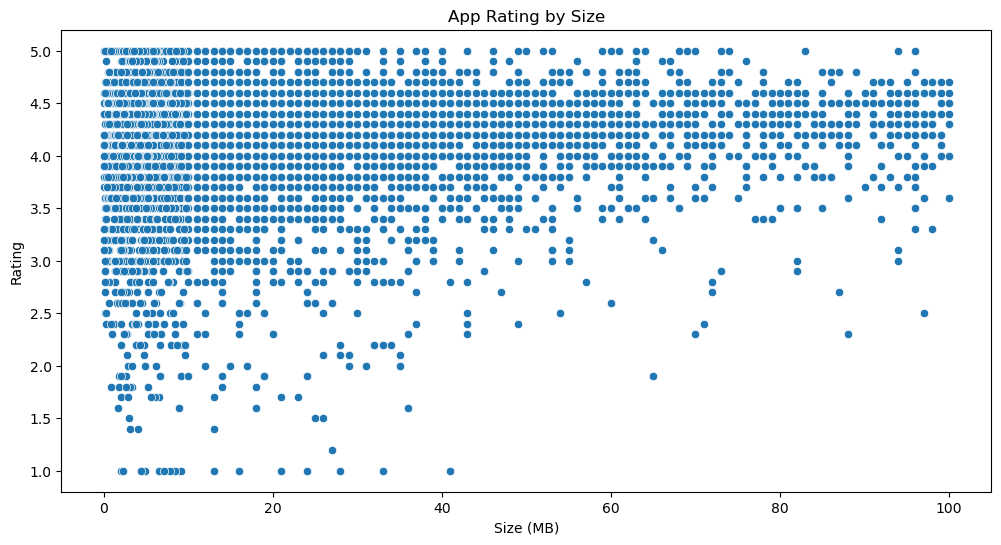

In [68]:
df['Size']=df['Size'].apply(lambda x:float(x.replace('M','')) if 'M' in x else (float(x.replace('k',''))/1024 if 'k' in x else None))

plt.figure(figsize=(12,6))
sns.scatterplot(x='Size',y='Rating',data=df)
plt.title('App Rating by Size')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

/tmp/ipykernel_78/1584761108.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Type').mean()['Price'].sort_values(ascending=False)[0:10].plot(kind='bar',title='Barchart of app Type vs Average Price')


<AxesSubplot: title={'center': 'Barchart of app Type vs Average Price'}, xlabel='Type'>

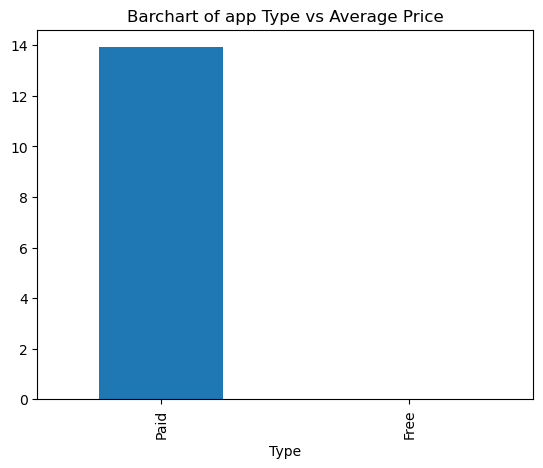

In [77]:
df.groupby(by='Type').mean()['Price'].sort_values(ascending=False)[0:10].plot(kind='bar',title='Barchart of app Type vs Average Price')

# Q15. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [56]:
install_counts=df['Installs'].value_counts()
top_10_apps=install_counts.head(10)
print(top_10_apps)

1,000,000+     1579
10,000,000+    1252
100,000+       1169
10,000+        1054
1,000+          907
5,000,000+      752
100+            719
500,000+        539
50,000+         479
5,000+          477
Name: Installs, dtype: int64


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [57]:
import pandas as pd

dataset=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

category_popularity=dataset.groupby('Category')['Installs'].sum().sort_values(ascending=False)

top_10_categories=category_popularity.head(10)

frequency_table=pd.DataFrame({'Category':top_10_categories.index, 'Total Installs':top_10_categories.values})

print(frequency_table)

              Category                                     Total Installs
0                  1.9                                               Free
1         PRODUCTIVITY  500,000,000+10,000,000+100,000,000+10,000,000+...
2               BEAUTY  500,000+1,000,000+100,000+500,000+1,000,000+50...
3               FAMILY  50,000,000+10,000,000+100,000,000+1,000,000+5,...
4              WEATHER  50,000,000+1,000,000+50,000,000+10,000+10,000,...
5      PERSONALIZATION  50,000,000+1,000,000+100,000,000+5,000,000+100...
6   LIBRARIES_AND_DEMO  50,000+10,000+100,000+1,000+100,000+10,000+100...
7            LIFESTYLE  5,000,000+10,000,000+100,000+10,000,000+5,000,...
8  BOOKS_AND_REFERENCE  100,000,000+50,000+100,000+10,000,000+100,000,...
9  MAPS_AND_NAVIGATION  100,000,000+5,000,000+10,000,000+10,000,000+5,...


# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

/tmp/ipykernel_78/2113383012.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',figsize=(10,10),title='Genres vs Average Rating')


<AxesSubplot: title={'center': 'Genres vs Average Rating'}, xlabel='Genres'>

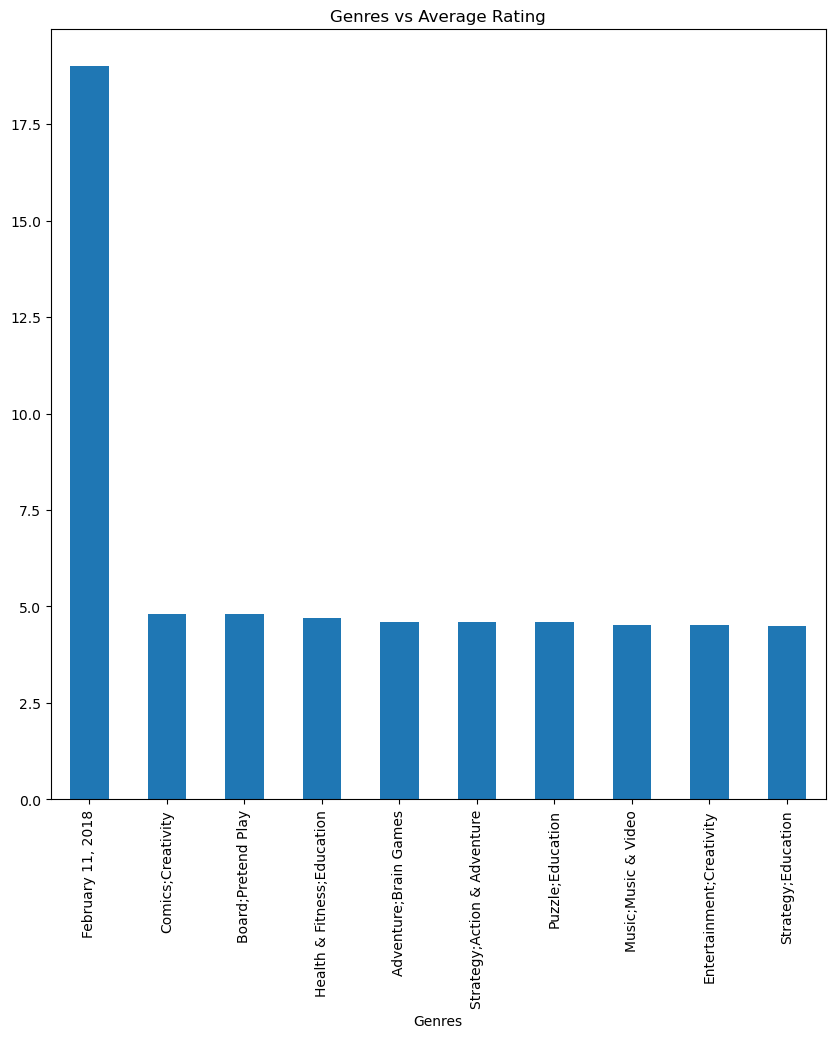

In [58]:
df.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',figsize=(10,10),title='Genres vs Average Rating')

/tmp/ipykernel_78/647672481.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Type').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='Type'>

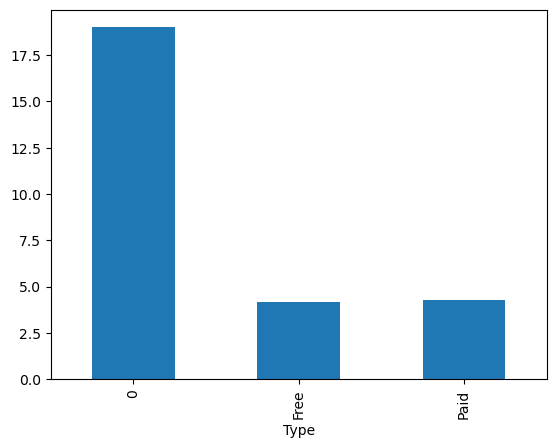

In [70]:
df.groupby(by='Type').mean()['Rating'].plot(kind='bar')

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [78]:
df['Last Updated']=pd.to_datetime(df['Last Updated'],errors='coerce')

df=df.dropna(subset=['Last Updated'])

df['day']=df['Last Updated'].dt.day
df['month']=df['Last Updated'].dt.month
df['year']=df['Last Updated'].dt.year
df['day_name']=df['Last Updated'].dt.day_name

/tmp/ipykernel_78/3976708952.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='month').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='month'>

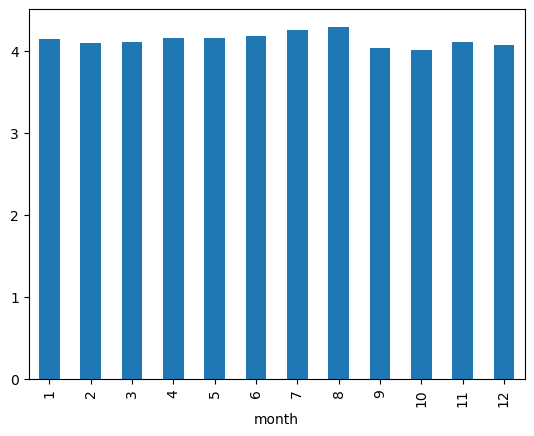

In [79]:
df.groupby(by='month').mean()['Rating'].plot(kind='bar')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      10840 non-null  int64         
 1   App             10840 non-null  object        
 2   Category        10840 non-null  object        
 3   Rating          9366 non-null   float64       
 4   Reviews         10840 non-null  int64         
 5   Size            9145 non-null   float64       
 6   Installs        10840 non-null  int64         
 7   Type            10839 non-null  object        
 8   Price           10840 non-null  float64       
 9   Content Rating  10840 non-null  object        
 10  Genres          10840 non-null  object        
 11  Last Updated    10840 non-null  datetime64[ns]
 12  Current Ver     10832 non-null  object        
 13  Android Ver     10838 non-null  object        
 14  Day             10840 non-null  int64         
 15  Mo

/tmp/ipykernel_78/2191275991.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['year']).sum()['Installs'].plot(kind='bar')


<AxesSubplot: xlabel='year'>

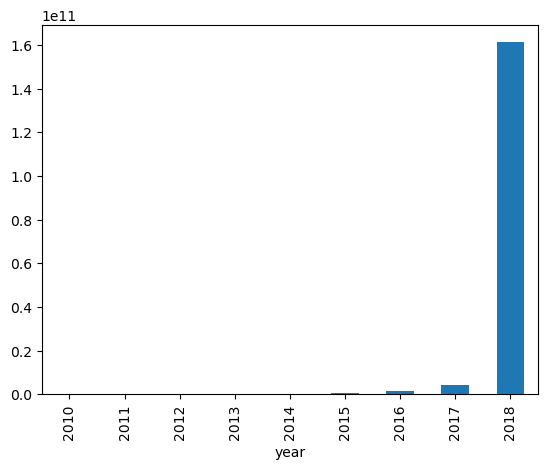

In [81]:
df.groupby(by=['year']).sum()['Installs'].plot(kind='bar')

User Reviews: The average number of user reviews for apps remains relatively consistent across different months and days of the week. There doesn't seem to be a significant correlation between the timing of app launches and the number of user reviews.

Popular Month: The month of August stands out as the period when the highest number of app installations occurred. This suggests that launching a new app in August may offer a higher potential for reaching a larger user base.

Popular Day of the Week: Thursdays appear to be the most favorable day for app installations. It implies that launching a new app on a Thursday might result in better traction and user engagement.

Increasing App Installs: The dataset indicates a consistent upward trend in app installations with each passing year. This growth signifies the expanding user base and the increasing popularity of mobile apps. Thus, launching a new app in the present timeframe could potentially yield a larger audience reach.